Default (10 trees) Accuracy: 1.0000


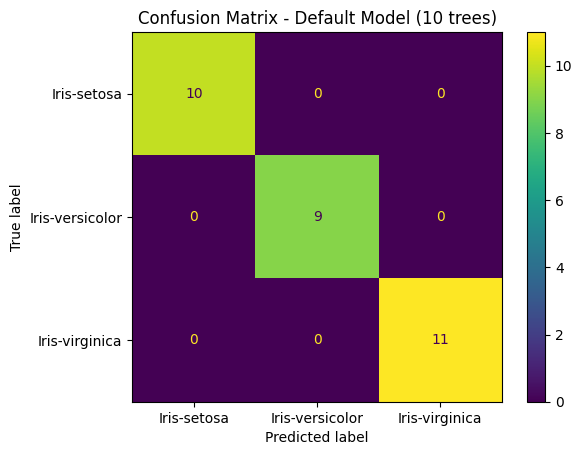

Best Accuracy: 1.0000 with 1 trees


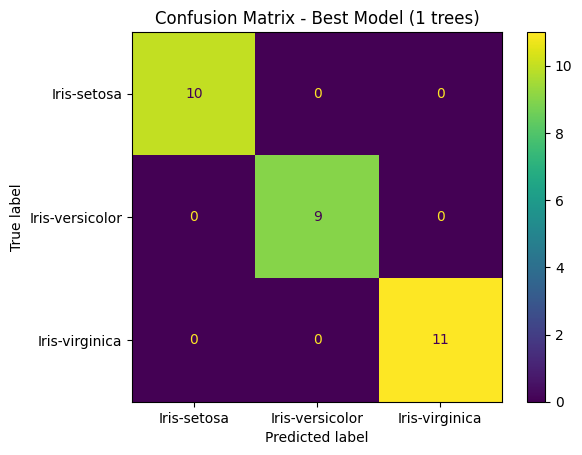

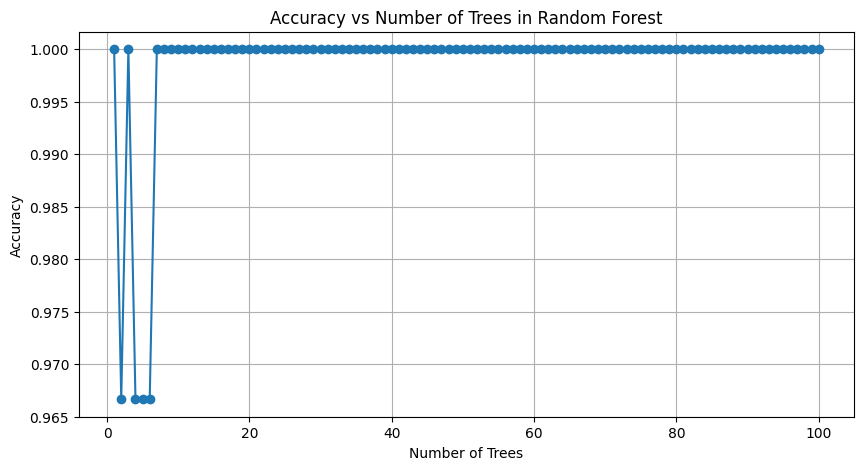

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

data = pd.read_csv("iris (2).csv")


X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
default_score = accuracy_score(y_test, y_pred_default)

print(f"Default (10 trees) Accuracy: {default_score:.4f}")
cm_default = confusion_matrix(y_test, y_pred_default, labels=rf_default.classes_)
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default, display_labels=rf_default.classes_)
disp_default.plot()
plt.title("Confusion Matrix - Default Model (10 trees)")
plt.show()

scores = []
estimators_range = range(1, 101)

for n in estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)


best_score = max(scores)
best_n = estimators_range[scores.index(best_score)]

print(f"Best Accuracy: {best_score:.4f} with {best_n} trees")


rf_best = RandomForestClassifier(n_estimators=best_n, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_best = rf_best.predict(X_test)


cm_best = confusion_matrix(y_test, y_pred_best, labels=rf_best.classes_)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=rf_best.classes_)
disp_best.plot()
plt.title(f"Confusion Matrix - Best Model ({best_n} trees)")
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(estimators_range, scores, marker='o')
plt.title("Accuracy vs Number of Trees in Random Forest")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()